In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = [5,2,5,6,1,1,2,5,7,8, 10, 10, 10, 10,10]  # 총 15개의 숫자

plt.hist(data, bins = 10)
plt.show()

np.median(data) # 6.0   중간값
np.mean(data)   # 6.133333333333334      산술평균
np.amax(data)   # 10    최대값

<Figure size 640x480 with 1 Axes>

10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 선형회귀를 사용하기 위한 준비
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 모형 추정 즉 학습을 위한 데이터 집합 (training data set)
# 성능 검증을 위한 데이터 집합 (test data set)
# 두 데이터 집합 모두 종속 변수값이 있어야 한다.
# 따라서 보통은 가지고 있는 데이터 집합을 학습용과 검증용으로 나누어
# 학습용 데이터만을 사용하여 회귀분석 모형을 만들고
# 검증용 데이터로 성능을 계산하는 학습/검증 데이터 분리(train-test split) 방법을 사용한다.

In [3]:
# csv 파일 불러오기
data2 = pd.read_csv("C:\MyPython\csv\salary.csv")
#print(data2)   # YearsExperience 와  Salary가 있음
data2['YearsExperience']
data2['Salary']         # 대소문자 구분함
type(data2['YearsExperience'])  # pandas.core.series.Series
type(data2['Salary'])   # pandas.core.series.Series
### Series 는 일련의 객체를 담을 수 있는 1차원 배열 같은 자료구조이다.   index와 values로 구성

x = data2['YearsExperience'].values
y = data2['Salary'].values
#x
# array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        #4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        #7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])
#y
# array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        #54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        #61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        #98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       #122391., 121872.])

    
# x 와 y를 1대1로 맞추기 위해 형변환
x1 = x.reshape(len(x),1)  # or x1 = x.reshape(-1,1)
x1.shape # (30,1)
y1 = y.reshape(-1,1)
x1.shape, y1.shape  # ((30, 1), (30, 1))  

((30, 1), (30, 1))

In [4]:
# 데이터가 많을 때 다 하기에는 양이 많으니 표본을 뽑는 작업이라고 생각
xTrain, xTest, yTrain, yTest = train_test_split(x1, y1, test_size = 1/3, random_state=0)
                                                # 20개는 Train, 10개는 Test로 들어감 
                                                # random_state=0
xTrain, xTest, yTrain, yTest

(array([[ 2.9],
        [ 5.1],
        [ 3.2],
        [ 4.5],
        [ 8.2],
        [ 6.8],
        [ 1.3],
        [10.5],
        [ 3. ],
        [ 2.2],
        [ 5.9],
        [ 6. ],
        [ 3.7],
        [ 3.2],
        [ 9. ],
        [ 2. ],
        [ 1.1],
        [ 7.1],
        [ 4.9],
        [ 4. ]]), array([[ 1.5],
        [10.3],
        [ 4.1],
        [ 3.9],
        [ 9.5],
        [ 8.7],
        [ 9.6],
        [ 4. ],
        [ 5.3],
        [ 7.9]]), array([[ 56642.],
        [ 66029.],
        [ 64445.],
        [ 61111.],
        [113812.],
        [ 91738.],
        [ 46205.],
        [121872.],
        [ 60150.],
        [ 39891.],
        [ 81363.],
        [ 93940.],
        [ 57189.],
        [ 54445.],
        [105582.],
        [ 43525.],
        [ 39343.],
        [ 98273.],
        [ 67938.],
        [ 56957.]]), array([[ 37731.],
        [122391.],
        [ 57081.],
        [ 63218.],
        [116969.],
        [109431.],
        [112635.],
    

In [13]:
# 선형회귀를 위해 변수 선언
linearTest = LinearRegression()          # LinearRegression()를 linearTest 라는 변수로 담는다.

# xTrain 과 yTrain 을 1대1 대응 해줌
linearTest.fit(xTrain, yTrain) # LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
                               # fit 을 쓰면 x 와 y 값을 묶어준다. 
    
# xTest 값의 y 값을 예측하여 yPrediction 이라는 변수에 저장
yPrediction = linearTest.predict(xTest)
print(xTest)
print(yPrediction)
print(yTest)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]
[[ 40835.10590871]
 [123079.39940819]
 [ 65134.55626083]
 [ 63265.36777221]
 [115602.64545369]
 [108125.8914992 ]
 [116537.23969801]
 [ 64199.96201652]
 [ 76349.68719258]
 [100649.1375447 ]]
[[ 37731.]
 [122391.]
 [ 57081.]
 [ 63218.]
 [116969.]
 [109431.]
 [112635.]
 [ 55794.]
 [ 83088.]
 [101302.]]


In [6]:
통계학에서, 선형 회귀(線型回歸, 영어: linear regression)는 종속 변수 y와
한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.
한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀,
둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다.

선형 회귀는 선형 예측 함수를 사용해 회귀식을 모델링하며, 알려지지 않은 파라미터는 데이터로부터 추정한다.
이렇게 만들어진 회귀식을 선형 모델이라고 한다.
# y = ax + b

SyntaxError: invalid syntax (<ipython-input-6-ef6498014d28>, line 1)

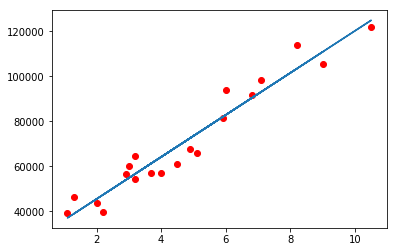

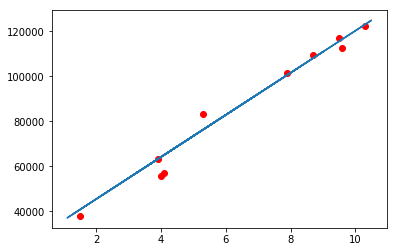

In [7]:
# 학습을 위한 데이터들로 점을 찍어본다.
plt.scatter(xTrain,yTrain,color="red")
# 이것들에 대한 예측으로 선을 그어버림(중간값?)
plt.plot(xTrain, linearTest.predict(xTrain))    # 선이 생김
plt.show()


# 검증을 위한 데이터들로 점을 찍고 예측값과 얼마나 차이가 나는지 봄
plt.scatter(xTest,yTest,color="red")
plt.plot(xTrain, linearTest.predict(xTrain))
plt.show()


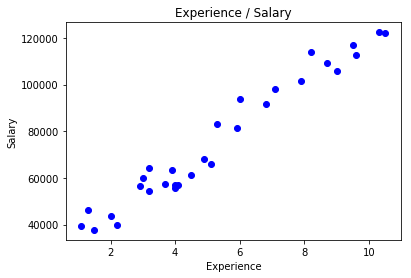

In [8]:
plt.scatter(x,y, color = "blue")
plt.title("Experience / Salary")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

10
10
(10, 1) (10, 1)


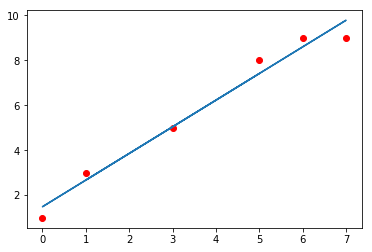

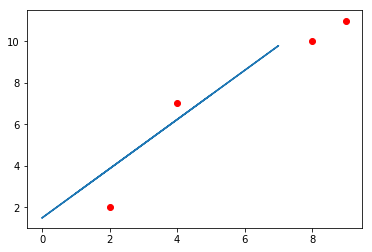

In [16]:
# 모형 추정 즉 학습을 위한 데이터 집합 (training data set)
# 성능 검증을 위한 데이터 집합 (test data set)
# 두 데이터 집합 모두 종속 변수값이 있어야 한다.
# 따라서 보통은 가지고 있는 데이터 집합을 학습용과 검증용으로 나누어
# 학습용 데이터만을 사용하여 회귀분석 모형을 만들고
# 검증용 데이터로 성능을 계산하는 학습/검증 데이터 분리(train-test split) 방법을 사용한다.


# 책 53 p  도 읽어봐라

# Linear Regression(선형회귀) 을 이용하여 Train/Test 하고 그래프로 출력하시오
x2 = np.array([0,1,2,3,4,5,6,7,8,9])
print(len(x2)) # 10
y2 = np.array([1,3,2,5,7,8,9,9,10,11])
print(len(y2)) # 10
x3 = np.array([1.5, 2.5, 3.5])
x2.shape # (10,)
y2.shape # (10,)

# 축 생성
x2_1 = x2.reshape(-1,1)
y2_1 = y2.reshape(-1,1)
print(x2_1.shape, y2_1.shape)     # (10, 1) (10, 1)

# Train, test 분리?
xTrain2, xTest2, yTrain2, yTest2 = train_test_split(x2_1, y2_1, test_size = 1/3, random_state=0)

# LinearRegression 불러오고 x와 y 값을 묶음
lT = LinearRegression()          # LinearRegression()를 linearTest 라는 변수로 담는다.
lT.fit(xTrain2, yTrain2) # LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
                               # fit 을 쓰면 x 와 y 값을 묶어준다. 


yPrediction2 = lT.predict(xTest2)

plt.scatter(xTrain2,yTrain2,color="red")
plt.plot(xTrain2, lT.predict(xTrain2))    # 선이 생김
plt.show()

plt.scatter(xTest2,yTest2,color="red")
plt.plot(xTrain2, lT.predict(xTrain2))
plt.show()